## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

In [3]:
# Write your code from here
import csv

# Create sample dataset CSV
with open("sample_data.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["name", "age", "email"])
    writer.writerow(["Alice", "30", "alice@example.com"])
    writer.writerow(["Bob", "", "bob@example.com"])
    writer.writerow(["", "25", "charlie@example.com"])

# Function to read CSV and calculate DQI
def read_data_and_calculate_dqi(filename):
    total_cells = 0
    missing_cells = 0

    with open(filename, mode='r', newline='') as file:
        reader = csv.reader(file)
        headers = next(reader)
        for row in reader:
            total_cells += len(row)
            missing_cells += sum(1 for cell in row if cell.strip() == '')

    dqi = 1 - (missing_cells / total_cells) if total_cells > 0 else 0
    return round(dqi, 2)

# Run function and print DQI
print(read_data_and_calculate_dqi("sample_data.csv"))

0.78


### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.

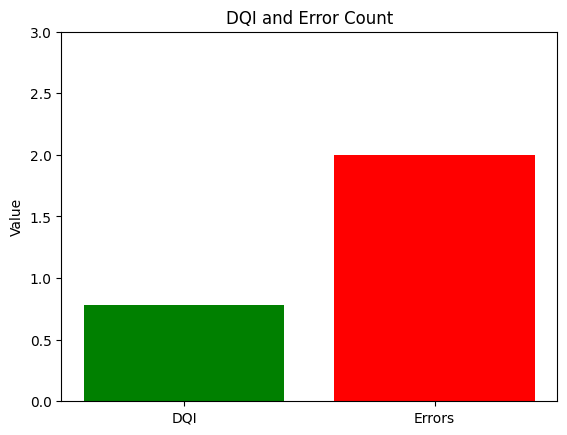

In [4]:
# Write your code from here
import csv
import matplotlib.pyplot as plt

# Create sample dataset CSV
with open("sample_data.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["name", "age", "email"])
    writer.writerow(["Alice", "30", "alice@example.com"])
    writer.writerow(["Bob", "", "bob@example.com"])
    writer.writerow(["", "25", "charlie@example.com"])

# Function to read CSV and calculate DQI and error count
def calculate_dqi_and_errors(filename):
    total_cells = 0
    missing_cells = 0

    with open(filename, mode='r', newline='') as file:
        reader = csv.reader(file)
        headers = next(reader)
        for row in reader:
            total_cells += len(row)
            missing_cells += sum(1 for cell in row if cell.strip() == '')

    dqi = 1 - (missing_cells / total_cells) if total_cells > 0 else 0
    return round(dqi, 2), missing_cells

# Calculate values
dqi_value, error_count = calculate_dqi_and_errors("sample_data.csv")

# Create bar plot
plt.bar(["DQI", "Errors"], [dqi_value, error_count], color=["green", "red"])
plt.title("DQI and Error Count")
plt.ylabel("Value")
plt.ylim(0, max(1, error_count + 1))
plt.show()
#